<a href="https://colab.research.google.com/github/kamranjaved/Arabic_OCR/blob/main/arabic_small_nougat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Arabic Optical Character Recognition**

This work aims to build a powerful Arabic OCR system ✨ that uses cutting-edge open-source transformer models 🤖. The system reads and converts Arabic text from:

📄 Scanned pages

✍️ Handwritten manuscripts

🖨️ Printed documents

Using a modern vision-to-text architecture, it achieves accurate transcription even with different fonts, noisy scans, and complex page layouts. 🔤🧠💡

In [1]:
!pip install -U transformers

In [2]:
pip install python-Levenshtein

## Local Inference on GPU
Model page: https://huggingface.co/MohamedRashad/arabic-small-nougat

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/MohamedRashad/arabic-small-nougat)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [3]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-to-text", model="MohamedRashad/arabic-small-nougat")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/transformers/models/auto/modeling_auto.py:2284: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor di

In [4]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForVision2Seq

tokenizer = AutoTokenizer.from_pretrained("MohamedRashad/arabic-small-nougat")
model = AutoModelForVision2Seq.from_pretrained("MohamedRashad/arabic-small-nougat")

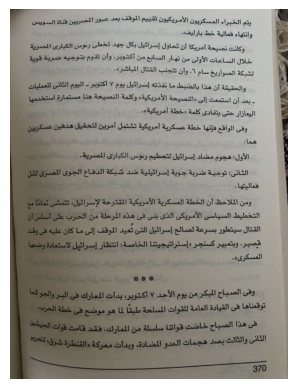

يتم الخبراء المستكريون الأمريكيون تقييم المؤهقف بعد عيود الصحريين هتاء السريعية واشتهاء فعالية خطة بارليقت.

وكائنَت نصيحة أمريكيا أن تحاول إسرائيل يكل جيد تخطئ دوصن الكتابئ المصرية خلال السناعات الأولى من تهائر السنائيج من اكتوبر. وأنَّ تحود بتوجه ضريحة كذية لشيكة الصواريخ سنام. ٦٠، وأنَّ تحتَب القتال المباشرة. 

والحمِّقة أنَّ هذا بالضبحة ما تفتُدَته استرائيل يكود النيوم الثكائن المعلمات بعد أنَّ استمعت إلى (التصبحة الأمريكية، وكلمة التصبحة حتَّا مستحمارة البِعاذُر حتَّا بتشادى كلمة «خطة امريكية». 

وقت الواقِّع فإنَّها خطة عسكرية أمريكية تشتمل أمريكية تشتمل أمريكية من التحقيق مُعدًى. 

هنا.

الأول: «محوِم مصاد إنسرائيل الجطلع رغوس الكنار بعي النصرية. 

الثاني: «توجيد ضرية جودة اسرائلته صَد، حسَكة اندقاء الحدى مخاليعًا. 

وبعد اللحظ أن الخطة العسكرية الأ 


In [14]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
from transformers import NougatProcessor, VisionEncoderDecoderModel

# Load the model and processor
processor = NougatProcessor.from_pretrained("MohamedRashad/arabic-small-nougat")
model = VisionEncoderDecoderModel.from_pretrained("MohamedRashad/arabic-small-nougat")
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

context_length = 2048

def predict(img_path):
    # prepare PDF image for the model
    image = Image.open(img_path)
    pixel_values = processor(image, return_tensors="pt").pixel_values

    # generate transcription
    outputs = model.generate(
        pixel_values.to(device),
        min_length=1,
        max_new_tokens=context_length,
        bad_words_ids=[[processor.tokenizer.unk_token_id]],
    )

    page_sequence = processor.batch_decode(outputs, skip_special_tokens=True)[0]
    page_sequence = processor.post_process_generation(page_sequence, fix_markdown=False)
    return page_sequence

path = "c.jpg"
img = Image.open(path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()
print(predict(path))


#Calculate Word Error Rate (WER)
📌 What is WER?

WER measures the difference between a predicted transcription and the ground truth.

WER
=(
𝑆
+
𝐷
+
𝐼)/
𝑁
	​


Where:

S = Substitutions

D = Deletions

I = Insertions

N = Number of words in reference (ground truth)

A lower WER means better OCR accuracy.

In [17]:
!pip install jiwer


In [20]:
from jiwer import wer

reference = "الأول: «محوِم مصاد إنسرائيل الجطلع"
hypothesis = "الأول «محوِم مصاد الجطلع"

error = wer(reference, hypothesis)
print("WER:", error)

WER: 0.4
